In [19]:
from author_style.utils import *
import tensorflow

In [8]:
df = csv_to_dataframes(output="p").query("author == 'GARY Romain' | author == 'SARRAUTE Nathalie'")

In [5]:
df

,text,author,title,book_date
300,1907. Son père quitte Ivanovo pour aller à Par...,SARRAUTE Nathalie,Le mensonge,1966
301,1 Cette didascalie n'était ni dans l'édition p...,SARRAUTE Nathalie,Le mensonge,1966
302,6 Nathalie Sarraute fit des études de droit et...,SARRAUTE Nathalie,Le mensonge,1966
303,"1923. Durant l'été, Nathalie fait l'ascension ...",SARRAUTE Nathalie,Le mensonge,1966
304,Se détourner de l'objet. Se fixer sur l'humain...,SARRAUTE Nathalie,Le mensonge,1966
...,...,...,...,...
18349,"Lui, comme il est prudent. Comme il se tient e...",SARRAUTE Nathalie,Portrait d_un inconnu,1948
18350,"Parfois, incapable de le contenir, il le laiss...",SARRAUTE Nathalie,Portrait d_un inconnu,1948
18351,Immobile comme une grosse araignée dans sa toi...,SARRAUTE Nathalie,Portrait d_un inconnu,1948
18352,Mais le masque ne se laisse pas faire. Il ne s...,SARRAUTE Nathalie,Portrait d_un inconnu,1948


In [7]:
data = df.drop(["book_date","title"], axis=1)

In [9]:
data.author = data.author.map({
    "SARRAUTE Nathalie" : 0,
    "GARY Romain" : 1
})

In [10]:
data

,text,author,title
300,1907. Son père quitte Ivanovo pour aller à Par...,0,Le mensonge
301,1 Cette didascalie n'était ni dans l'édition p...,0,Le mensonge
302,6 Nathalie Sarraute fit des études de droit et...,0,Le mensonge
303,"1923. Durant l'été, Nathalie fait l'ascension ...",0,Le mensonge
304,Se détourner de l'objet. Se fixer sur l'humain...,0,Le mensonge
...,...,...,...
18349,"Lui, comme il est prudent. Comme il se tient e...",0,Portrait d_un inconnu
18350,"Parfois, incapable de le contenir, il le laiss...",0,Portrait d_un inconnu
18351,Immobile comme une grosse araignée dans sa toi...,0,Portrait d_un inconnu
18352,Mais le masque ne se laisse pas faire. Il ne s...,0,Portrait d_un inconnu


In [31]:
data["taille"] = data.text.apply(lambda x : len(x))

In [34]:
data

,text,author,taille
300,1907. Son père quitte Ivanovo pour aller à Par...,0,1109
301,1 Cette didascalie n'était ni dans l'édition p...,0,912
302,6 Nathalie Sarraute fit des études de droit et...,0,746
303,"1923. Durant l'été, Nathalie fait l'ascension ...",0,613
304,Se détourner de l'objet. Se fixer sur l'humain...,0,572
...,...,...,...
18349,"Lui, comme il est prudent. Comme il se tient e...",0,189
18350,"Parfois, incapable de le contenir, il le laiss...",0,187
18351,Immobile comme une grosse araignée dans sa toi...,0,187
18352,Mais le masque ne se laisse pas faire. Il ne s...,0,183


/Users/cyrielle/.pyenv/versions/3.8.6/envs/author_style/lib/python3.8/site-packages/seaborn/distributions.py:565: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artists = plot_func(


ConversionError: Failed to convert value(s) to axis units: 'taille'

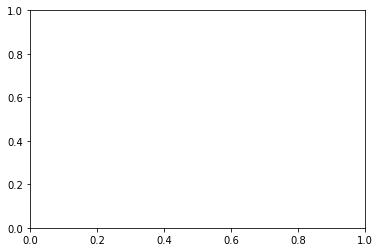

In [33]:
import seaborn as sns
import matplotlib as plt



In [12]:
data = data[["text","author"]]

In [13]:
data

,text,author
300,1907. Son père quitte Ivanovo pour aller à Par...,0
301,1 Cette didascalie n'était ni dans l'édition p...,0
302,6 Nathalie Sarraute fit des études de droit et...,0
303,"1923. Durant l'été, Nathalie fait l'ascension ...",0
304,Se détourner de l'objet. Se fixer sur l'humain...,0
...,...,...
18349,"Lui, comme il est prudent. Comme il se tient e...",0
18350,"Parfois, incapable de le contenir, il le laiss...",0
18351,Immobile comme une grosse araignée dans sa toi...,0
18352,Mais le masque ne se laisse pas faire. Il ne s...,0


In [25]:
X = data["text"].to_numpy()
y = data["author"].to_numpy()

In [26]:
X

array(["1907. Son père quitte Ivanovo pour aller à Paris et en Suède empêcher l'extradition de son jeune frère, demandée par la police tsariste (l'« Okhrana »). Jacob Tcherniak, qui appartenait à un groupe révolutionnaire, est accusé d'avoir pris part à un attentat contre un fourgon postal (le 14 octobre 1906). Ilya mène la campagne pour sauver son frère, fort de l'aide des socialistes européens (dont Jaurès) et d'Anatole France, Pierre Quillard, Étienne Avenard, etc. Il est finalement reçu par le roi de Suède et obtient la libération de Jacob, qui est embarqué à Göteborg sur un bateau pour Anvers. Mais à l'arrivée, Jacob est découvert asphyxié dans sa cabine, par des gaz délétères qui ont tué également quatre autres passagers. Des funérailles solennelles sont organisées par les mouvements socialistes européens. À la suite de ces événements, le Dr Tcherniak, qui ne peut rentrer en Russie, s'établit définitivement à Paris. Il fonde à Vanves, sur une plus petite échelle, une fabrique de 

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [27]:
### Let's tokenize the vocabulary 
tk = Tokenizer()

tk.fit_on_texts(X)

vocab_size = len(tk.word_index)

print(f'There are {vocab_size} different words in your corpus')

There are 30063 different words in your corpus


In [28]:
X_token = tk.texts_to_sequences(X)

In [37]:
X_token

[[8302,
  29,
  159,
  3126,
  2346,
  20,
  295,
  4,
  358,
  2,
  12,
  2214,
  1333,
  8303,
  1,
  29,
  220,
  1493,
  8304,
  42,
  3,
  768,
  6739,
  5691,
  6740,
  39,
  2496,
  1281,
  16,
  5692,
  4,
  9,
  889,
  6741,
  45,
  4298,
  612,
  258,
  248,
  4,
  9,
  4895,
  126,
  9,
  5693,
  8305,
  5,
  3127,
  1706,
  3440,
  2347,
  3441,
  3,
  951,
  20,
  1136,
  29,
  1493,
  201,
  1,
  3442,
  13,
  4896,
  3443,
  117,
  8306,
  2,
  8307,
  362,
  637,
  8308,
  15736,
  8309,
  3444,
  6,
  45,
  846,
  1073,
  42,
  5,
  2215,
  1,
  2214,
  2,
  4897,
  3,
  1873,
  1,
  2496,
  16,
  45,
  6742,
  4,
  8310,
  25,
  9,
  2497,
  20,
  6743,
  24,
  4,
  4898,
  2496,
  45,
  2896,
  6744,
  14,
  40,
  4899,
  42,
  13,
  2348,
  8311,
  16,
  149,
  1707,
  672,
  420,
  199,
  4299,
  13,
  8312,
  6745,
  89,
  6746,
  42,
  7,
  814,
  4896,
  3443,
  4,
  3,
  342,
  1,
  70,
  2349,
  5,
  8313,
  1281,
  16,
  17,
  74,
  1202,
  12,
  815,
  4900,

In [36]:
### Pad your inputs
X_pad = pad_sequences(X_token, dtype='float64', padding='post')


print("X_pad.shape", X_pad.shape)
X_pad

X_pad.shape (2874, 1852)


array([[8.3020e+03, 2.9000e+01, 1.5900e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.4600e+02, 5.7000e+01, 1.0969e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.5741e+04, 2.8100e+02, 3.7300e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [9.4000e+02, 3.3000e+01, 1.5000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.4000e+01, 5.0000e+00, 1.8270e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+01, 1.2200e+02, 1.0872e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [35]:
### Let's build the Neural network now
from tensorflow.keras import layers, Sequential

In [40]:
# Size of your embedding space = size to represent each word
embedding_size = 100

model = Sequential()

model.add(layers.Embedding(
    input_dim=vocab_size+1, # 16 +1 for the 0 padding
    input_length=1852, # Max_sentence_length (optional, for model summary)
    output_dim=embedding_size,# 100
    mask_zero=True, # Included masking layer :)
))

model.add(layers.GRU(64,return_sequences= True))
model.add(layers.GRU(64))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1852, 100)         3006400   
_________________________________________________________________
gru_2 (GRU)                  (None, 1852, 64)          31872     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 3,063,297
Trainable params: 3,063,297
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [43]:
model.fit(X_pad, y, epochs=2, batch_size=64, verbose=1)

Epoch 1/2
45/45 [==============================] - 147s 3s/step - loss: 0.5920 - accuracy: 0.6545
Epoch 2/2
45/45 [==============================] - 131s 3s/step - loss: 0.1530 - accuracy: 0.9485


In [44]:
import joblib

joblib.dump(X_pad,"X.pkl")
joblib.dump(y,"y.pkl")

['y.pkl']